In [13]:
import matplotlib.pyplot as plt

In [14]:
# f = open("./toy_dataset.txt", "r")
# lines = f.readlines()
# data = []
# for line in lines:
#     data.append(int(line.strip().split()[0]))
# f.close()

In [15]:
# data = data[230:270]*8
# # data[150:180] = [x+100 for x in data[150:180]]
# print(len(data))
# for i in range(90,100):
#     data[i] = data[i] + 100

# for i in range(150,160):
#     data[i] = data[i] + 50

# for i in range(180,190):
#     data[i] = data[i] + 200

# for i in range(264,270):
#     data[i] = data[i] + 350

In [16]:
# f = open("./data.txt", "w")
# for i in data:
#     f.write(f"{i}\n")
# f.close()

In [17]:
f = open("./data.txt", "r")
lines = f.readlines()
data = []
for line in lines:
    data.append(int(line.strip()))
f.close()

In [18]:
import math


matrix_profile = []

window_size = 5

for i in range(len(data)-window_size):
    cur_subsequence = data[i:i+window_size]
    min_dist = float('inf')
    for j in range(len(data)-window_size):
        if j == i:
            continue
        compare_subsequence = data[j:j+window_size]
        distance = 0
        mean_cur_subsequence = sum(cur_subsequence) / window_size
        std_cur_subsequence = math.sqrt(sum(list(map(lambda x: (x-mean_cur_subsequence)**2 , cur_subsequence))))
        
        mean_compare_subsequence = sum(compare_subsequence) / window_size
        std_compare_subsequence = math.sqrt(sum(list(map(lambda x: (x-mean_compare_subsequence)**2 , compare_subsequence))))

        znorm_cur_subsequence_val = lambda x: 10 if std_cur_subsequence==0 else  (x-mean_cur_subsequence)/std_cur_subsequence
        znorm_compare_subsequence_val = lambda x: 10 if std_compare_subsequence==0 else (x-mean_compare_subsequence)/std_compare_subsequence
        
        for k in range(window_size):
            distance += (
                    znorm_cur_subsequence_val(cur_subsequence[k]) - znorm_compare_subsequence_val(compare_subsequence[k])
                ) ** 2
        distance = math.sqrt(distance)
        if distance < min_dist:
            min_dist = distance
    matrix_profile.append(min_dist*10.2)


In [19]:
left_mp = []

for i in range(len(data)-window_size):
    cur_subsequence = data[i:i+window_size]
    min_dist = float('inf')
    for j in range(i):
        if j == i:
            continue
        compare_subsequence = data[j:j+window_size]
        distance = 0
        mean_cur_subsequence = sum(cur_subsequence) / window_size
        std_cur_subsequence = math.sqrt(sum(list(map(lambda x: (x-mean_cur_subsequence)**2 , cur_subsequence))))
        
        mean_compare_subsequence = sum(compare_subsequence) / window_size
        std_compare_subsequence = math.sqrt(sum(list(map(lambda x: (x-mean_compare_subsequence)**2 , compare_subsequence))))

        znorm_cur_subsequence_val = lambda x: 10 if std_cur_subsequence==0 else  (x-mean_cur_subsequence)/std_cur_subsequence
        znorm_compare_subsequence_val = lambda x: 10 if std_compare_subsequence==0 else (x-mean_compare_subsequence)/std_compare_subsequence
        
        for k in range(window_size):
            distance += (
                    znorm_cur_subsequence_val(cur_subsequence[k]) - znorm_compare_subsequence_val(compare_subsequence[k])
                ) ** 2
        distance = math.sqrt(distance)
        if distance < min_dist:
            min_dist = distance
    left_mp.append(math.sqrt(min_dist)*10)
    

In [20]:
left_mp_rd = []

def relativeDistance(a, b) -> float:
        abs_distance = sum(abs(a[i] - b[i]) for i in range(len(a)))
        cmp = sum(abs(b[i]) for i in range(len(b)))
        if cmp == 0:
            return 1  # Infinite distance if cmp is 0
        rd = abs_distance / cmp
        if rd > 1:  # Relative distance may be greater than 1
            return 1
        return rd

for i in range(len(data)-window_size):
    cur_subsequence = data[i:i+window_size]
    min_dist = float('inf')
    for j in range(i):
        if j == i:
            continue
        compare_subsequence = data[j:j+window_size]
        distance = relativeDistance(cur_subsequence, compare_subsequence)
        if distance < min_dist:
            min_dist = distance
    left_mp_rd.append(min_dist)

In [21]:
thresh = [0.5]*(len(data)-window_size)

In [22]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

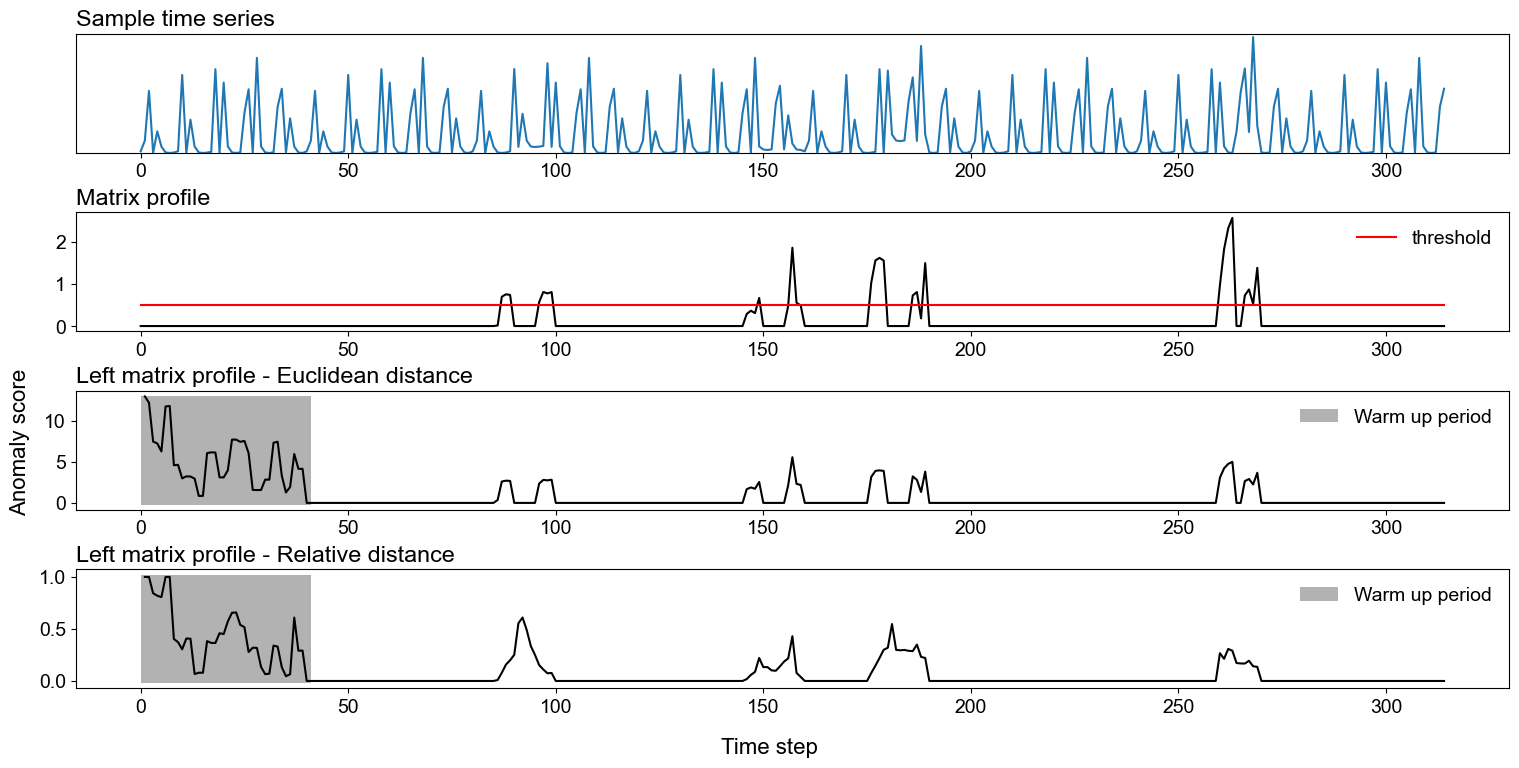

In [41]:
plt.figure()

plt.subplot(411)
plt.plot(data[:-window_size])
plt.title('Sample time series', loc='left')
plt.ylim(0,2000)
# plt.axis('off')
plt.gca().get_yaxis().set_visible(False)

plt.subplot(412)
plt.plot(matrix_profile, color='black')
plt.plot(thresh,color = 'red', label = 'threshold')
plt.title('Matrix profile', loc='left')
# plt.fill_between(range(len(matrix_profile)),0, thresh, facecolor='red', alpha=0.3, label = 'Anomaly')
plt.legend(frameon = False,loc = 'upper right')
# plt.axis('off')

plt.subplot(413)
plt.plot(left_mp, color='black')
# plt.plot(thresh,color = 'red', label = 'threshold')
plt.fill_between(range(42),-0.2, 13, facecolor='black', alpha=0.3, label = 'Warm up period')
plt.legend(frameon = False,loc = 'upper right')
plt.title('Left matrix profile - Euclidean distance', loc='left')

plt.subplot(414)
plt.plot(left_mp_rd, color='black')
# plt.plot(thresh,color = 'red', label = 'threshold')
plt.fill_between(range(42),-0.02, 1.02, facecolor='black', alpha=0.3, label = 'Warm up period')
plt.legend(frameon = False,loc = 'upper right')
plt.title('Left matrix profile - Relative distance', loc='left')

plt.gcf().text(0.5, 0.04, "Time step", ha='center', va='center', fontsize=16)
plt.gcf().text(0.095, 0.4, "Anomaly score", ha='center', va='center', rotation='vertical', fontsize=16)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.50)
plt.gcf().set_size_inches(18.5,8.5)
plt.savefig('senev1.png',bbox_inches='tight')
plt.show()